<!DOCTYPE html>

<html>

<head>

<title>Magos da Furadeira</title>

</head>

<body>

<div style="display: flex; align-items: center;">

<img src="https://i.ibb.co/z490FF5/FUNDO-REMOVIDO.png" alt="FUNDO REMOVIDO">

<p style="margin-left: 40px; font-size: 24px; font-weight: bold; border-bottom: 1px solid black;">José David e Gabriel Torquarto - <br> Magos da Furadeira Bosch de Impacto </p>

</div>

</body>

</html>

 

Dados 2
Normalizando e transformando dados

ID: Dados 02

Proponente: Patrulheiro Formidável Amarelo

Objetivo: Escolha um conjunto de dados qualquer que contenha pelo menos 1 coluna com dados numéricos (pode ser atributo ou target, tanto faz). Faça operações de normalização e transformação neste dataset e observe o que acontece.

Comentários adicionais: Não é para intercalar operações de normalização e transformação, basta executar estas operações e observar o resultado.

Pontuação máxima: 10 pontos

In [71]:
import seaborn as sbn

In [72]:
atencao = sbn.load_dataset('car_crashes', cache=True, data_home=None)
#display(atencao)

Nesta atividade usaremos a biblioteca seaborn (como sbn) pois ela contém todas as funções necessárias para normalizarmos os dados.
Para essa atividade utilizamos um dataset com dados referentes a diamantes, tais como cor, preço, corte, peso e claridade. No entanto, a coluna a ser trabalhada será a de preços, que demonstrou maior variância.

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74



 Tipos de variável:
 carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

 Tipos de variável(convertidas):
 carat       Float64
cut        category
color      category
clarity    category
depth       Float64
table       Float64
price         Int64
x           Float64
y           Float64
z           Float64
dtype: object


<Axes: xlabel='price', ylabel='Count'>

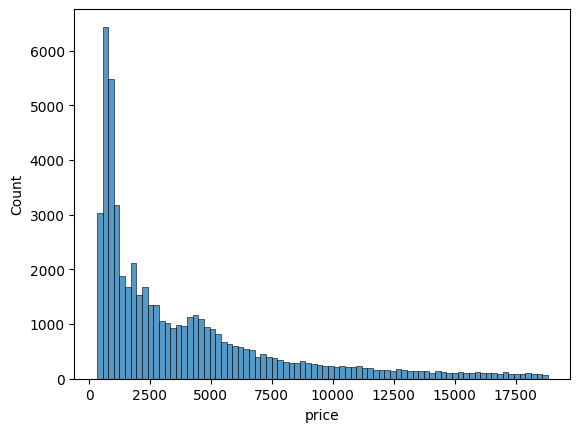

In [93]:
diamantes = sbn.load_dataset('diamonds', cache=True, data_home=None)
display(diamantes)
print("\n Tipos de variável:\n", diamantes.dtypes)
print("\n Tipos de variável(convertidas):\n", diamantes.convert_dtypes().dtypes)
sbn.histplot(x = diamantes['price'])

No histograma acima está representada a distribuição de preços de cada diamante. Note que a distribuição é bem desigual, tendo valores exorbitantemente superiores a outros.
No contexto do tratamento de dados, muitos datasets trabalhados apresentam valores com enorme variação, como o exemplo acima. Nesse sentido, é necessário que se faça a normalização desses valores. A normalização é um processo realizado como parte da preparação de dados para o aprendizado de máquina. Ela é aplicada quando pretendemos mudar os valores de uma coluna, de modo que fiquem numa escala comum. Há muitas formas de normalizar dados, como: zscore, max e min, logística, lognormal, etc. [1]

In [94]:
# exibindo apenas a coluna de interesse para fins ilustrativos
print(diamantes['price'])

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64


<Axes: xlabel='price_zscore', ylabel='Count'>

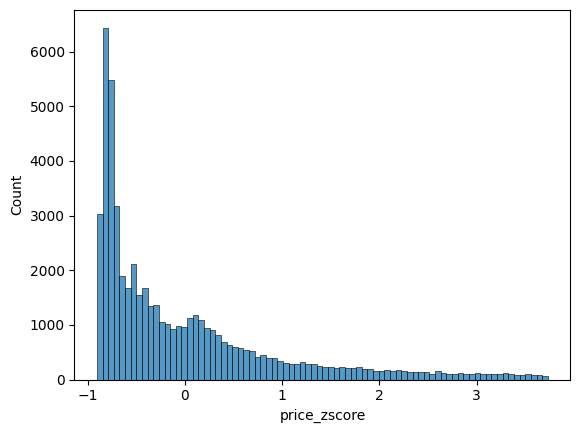

In [99]:
media = diamantes['price'].mean()
desvio_padrao = diamantes['price'].std()

diamantes['price_zscore'] = (diamantes['price'] - media) / desvio_padrao

sbn.histplot(x=diamantes['price_zscore'])

Na célula acima aplicou-se a normalização por zscore. Essa normalização consiste em subtrair a média de todos os valores de cada valor, e em seguida dividi-los pelo desvio padrão. Essa técnica geralmente é utilizada quando queremos tornar os dados comparáveis, o que resulta em uma distribuição normal com média zero e desvio padrão igual a um. [2]

Outra normalização comumente utilizada para normalizar 

## Referências

[1] LIKEBUPT. Normalizar Dados: referência de componente - Azure Machine Learning. Disponível em: <https://learn.microsoft.com/pt-br/azure/machine-learning/component-reference/normalize-data?view=azureml-api-2>. Acesso em: 22 ago. 2023.

[2] Normalização de Dados. Disponível em: <https://www.linkedin.com/pulse/normaliza%C3%A7%C3%A3o-de-dados-jose-r-f-junior-1f/?originalSubdomain=pt>. Acesso em: 22 ago. 2023.

‌

‌